In [1]:
!pip install tensorflow numpy
!pip install pillow



import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import numpy as np
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential

from keras import layers, models, regularizers
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
!pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [9]:
# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255) # vertical_flip=True,
                                                   # horizontal_flip=True,
                                                   # height_shift_range=0.1,
                                                   # width_shift_range=0.1
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size
train_generator = train_datagen.flow_from_directory(
    'B:\\OneDrive - Amity University\\Sem-4\\AiCraft\\Train',
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    # vertical_flip=True,
    # horizontal_flip=True,
    # height_shift_range=0.1,
    # width_shift_range=0.1
)


# Read Validation data from directory and define target size with batch size
validation_generator= validation_datagen.flow_from_directory(
    r'B:\OneDrive - Amity University\Sem-4\AiCraft\Val',
    target_size=(128, 128),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    r'B:\OneDrive - Amity University\Sem-4\AiCraft\Test',
    target_size=(128, 128),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)



Found 1872 images belonging to 5 classes.
Found 585 images belonging to 5 classes.
Found 291 images belonging to 5 classes.


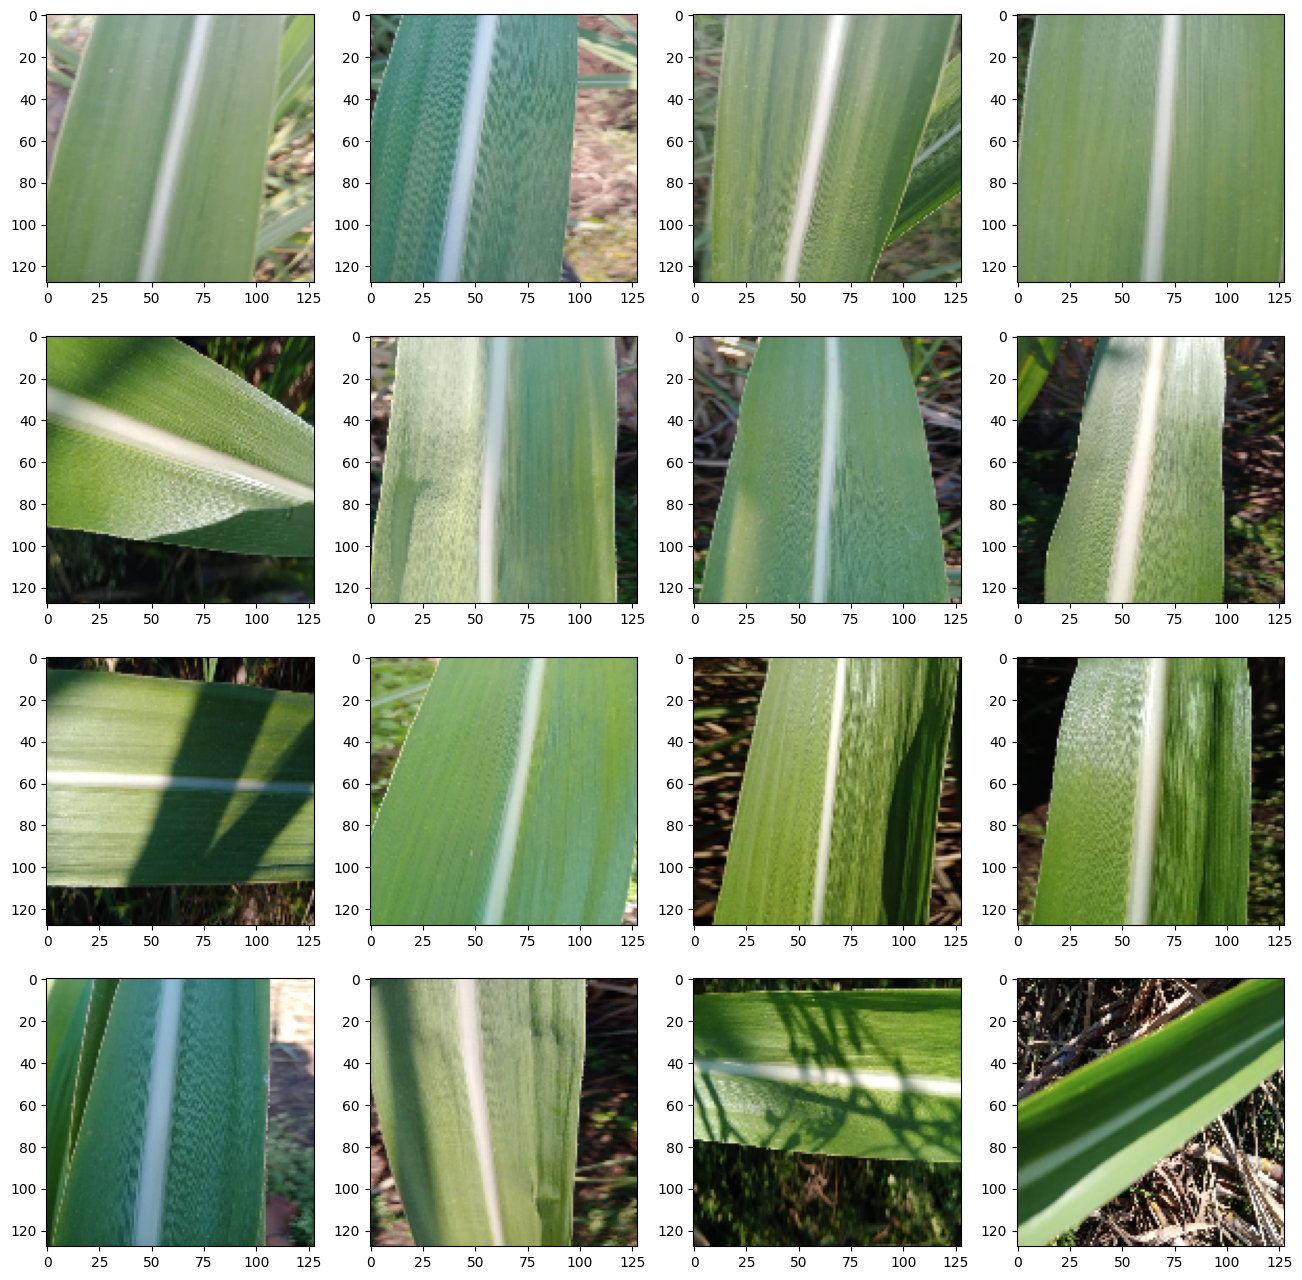

In [10]:
plt.figure(figsize=(16, 16))
for i in range(1, 17):
  plt.subplot(4, 4, i)
  img, label = test_generator.next()
  plt.imshow(img[0])
plt.show()

In [11]:
img, label = test_generator.next()
img[0].shape

(128, 128, 3)

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape= (128, 128, 3)) # Include_top = False means excluding the model fully connected layers
base_model.trainable = False ## Not trainable weights

base_model.summary()



58889256/58889256 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                           

In [29]:
flatten_layer = layers.GlobalAveragePooling2D()
dense_layer_1 = layers.Dense(126, activation='relu')
dense_layer_2 = layers.Dense(63, activation='relu')
dense_layer_3 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 14717253 (56.14 MB)
Trainable params: 2565 (10.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [47]:
# sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9, nesterov=True)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
history=model.compile(optimizer=Adam(learning_rate=.0001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(train_generator,
      steps_per_epoch=17,
      epochs=400,
      validation_data=validation_generator,
      validation_steps=36,
      verbose=1)

Epoch 1/400
17/17 [==============================] - 32s 2s/step - loss: 0.9356 - accuracy: 0.6765 - val_loss: 0.9847 - val_accuracy: 0.6562
Epoch 2/400
 5/17 [=======>......................] - ETA: 8s - loss: 0.9742 - accuracy: 0.6000

KeyboardInterrupt: 

In [46]:
#Classification Report
metrics = history.history
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['training', 'validation'])
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['training', 'validation'])
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

AttributeError: 'NoneType' object has no attribute 'history'

In [13]:
model.evaluate(validationdata, return_dict=True)

19/19 [==============================] - 84s 5s/step - loss: 1.6710 - accuracy: 0.7189


{'loss': 1.671034812927246, 'accuracy': 0.7188552021980286}

In [15]:
model.evaluate(traindata, return_dict=True)

47/47 [==============================] - 390s 8s/step - loss: 3.1702e-04 - accuracy: 1.0000


{'loss': 0.0003170162672176957, 'accuracy': 1.0}

In [42]:
# Predict class probabilities
y_pred_prob = model.predict(testdata)
y_pred = tf.argmax(y_pred_prob, axis=1)

# Get true labels
y_true = testdata.classes

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

291/291 [==============================] - 13s 45ms/step
Accuracy: 0.5807560137457045
Precision: 0.5888362488251341
Recall: 0.5807560137457045
F1-score: 0.5745268767778818


Confusion Matrix:
[[66 12  6  0  9]
 [ 7 31  1  2  5]
 [ 4  2 34  6  5]
 [ 8  5 12 22  4]
 [11 14  8  1 16]]


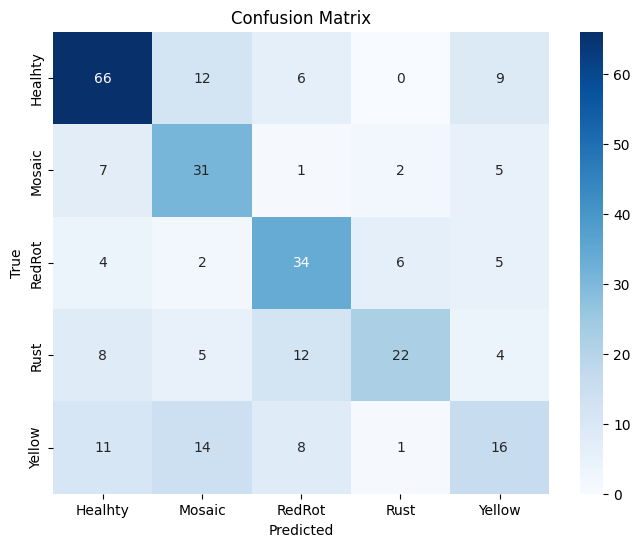

In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true and y_pred are your true and predicted labels respectively
# y_true and y_pred should be numpy arrays or lists

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# If you want to visualize the confusion matrix, you can use seaborn or matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Define labels for the confusion matrix
labels = ['Healhty', 'Mosaic', 'RedRot','Rust','Yellow']  # Replace with your actual class labels

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [35]:
# Save the model in the native Keras format
model.save('SugarcaneLeaf.keras')

In [36]:
# Load the saved model
loaded_model1 = tf.keras.models.load_model('Sugarcaneleaf.keras')

# Display the model summary
loaded_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 14717253 (56.14 MB)
Trainable params: 2565 (10.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
